Practice 1 

In [226]:
def lomuto_partition(A, l, r):
    # p ← A[l]
    p = A[l]

    # s ← l
    s = l

    # for i ← l+1 to r do
    for i in range(l + 1, r + 1):

        # if A[i] < p then
        if A[i] < p:
            # s ← s + 1
            s = s + 1

            # swap(A[s], A[i])
            A[s], A[i] = A[i], A[s]

    # swap(A[l], A[s])
    A[l], A[s] = A[s], A[l]

    # return s
    return s


In [227]:
A = [4, 3, 1, 2, 5, 9, 8, 7]

pivot_index = lomuto_partition(A, 0, len(A) - 1) #ใช้ Lomuto partition algorithm เพื่อแบ่งอาร์เรย์

print("Array after partition:", A)
print("Pivot index:", pivot_index)


Array after partition: [2, 3, 1, 4, 5, 9, 8, 7]
Pivot index: 3


ใช้ Quick Sort แบบเรียงด้านซ้ายขวา

In [228]:
def quick_sort(A, l, r):
    if l < r:
        s = lomuto_partition(A, l, r)
        quick_sort(A, l, s - 1)   # ซ้ายของ pivot
        quick_sort(A, s + 1, r)   # ขวาของ pivot


In [229]:
A = [4, 3, 1, 2, 5, 9, 8, 7]

quick_sort(A, 0, len(A) - 1)

print(A)


[1, 2, 3, 4, 5, 7, 8, 9]


ใช้ Lomuto + Loop (Iterative Quick Sort)

In [230]:
def quick_sort_iterative(A):
    stack = []                      # ใช้ stack เก็บช่วง (l, r)
    stack.append((0, len(A) - 1))   # เริ่มจากทั้งอาร์เรย์

    while stack: # ขณะที่ stack ไม่ว่าง
        l, r = stack.pop()
        # ใช้ stack + loop คุมช่วงซ้าย–ขวา
        if l < r: 
            s = lomuto_partition(A, l, r)

            # เก็บช่วงซ้าย
            stack.append((l, s - 1))

            # เก็บช่วงขวา
            stack.append((s + 1, r))


In [231]:
A = [4, 3, 1, 2, 5, 9, 8, 7]

quick_sort_iterative(A)

print(A)


[1, 2, 3, 4, 5, 7, 8, 9]


Practice 2

In [232]:
def hoare_partition(A, l, r):
    # p ← A[l]
    p = A[l]

    # i ← l ; j ← r + 1
    i = l-1
    j = r + 1

    while True:
        # repeat i ← i + 1 until A[i] ≥ p
        # i วิ่งจากซ้าย หา element ≥ pivot
        i += 1
        while A[i] < p:
            i += 1

        # repeat j ← j − 1 until A[j] ≤ p
        # j วิ่งจากขวา หา element ≤ pivot
        j -= 1
        while A[j] > p:
            j -= 1

        # until i ≥ j
        # ถ้า pointer ตัดกัน หยุด
        if i >= j:
            break

        # swap(A[i], A[j])
        A[i], A[j] = A[j], A[i]

    # swap(A[l], A[j])
    A[l], A[j] = A[j], A[l]

    # return j
    return j


In [233]:
A = [4, 3, 1, 2, 5, 9, 8, 7]
hoare_partition(A, 0, len(A) - 1)
print(A)

[1, 3, 2, 4, 5, 9, 8, 7]


In [234]:
def quick_sort_hoare(A, l, r):
    if l < r:
        p = hoare_partition(A, l, r)
        quick_sort_hoare(A, l, p - 1)
        quick_sort_hoare(A, p + 1, r)

In [235]:
A = [4, 3, 1, 2, 5, 9, 8, 7]
quick_sort(A, 0, len(A) - 1)
print(A)

[1, 2, 3, 4, 5, 7, 8, 9]


Assignment 1

แนวคิดของ Strassen’s Matrix Multiplication

การคูณเมทริกซ์แบบปกติ (Naive Method)
ต้องใช้การคูณ 8 ครั้ง สำหรับเมทริกซ์ขนาด 2×2

Strassen เสนอวิธีใหม่ที่:

แบ่งเมทริกซ์ออกเป็น 4 ส่วน

ใช้การคูณเพียง 7 ครั้ง

ลด Time Complexity จาก
O(n³) → O(n^log₂7) ≈ O(n²·⁸⁰⁷)

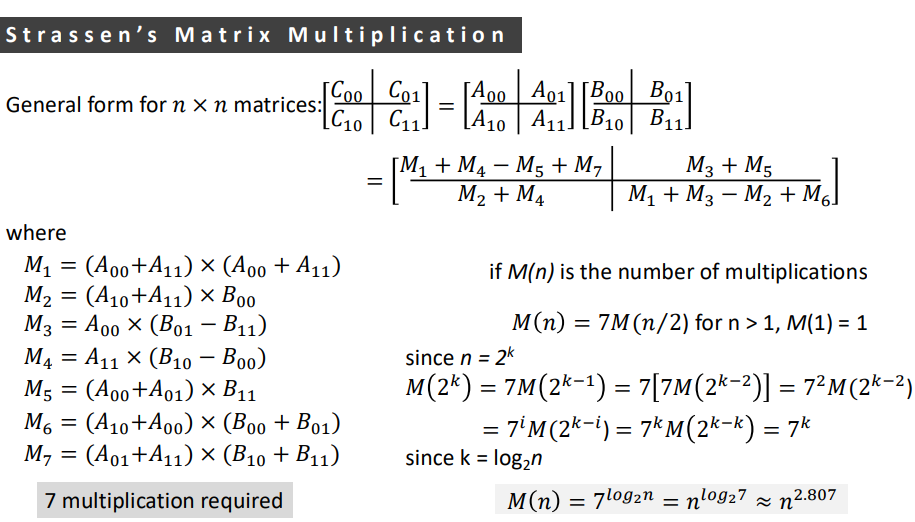

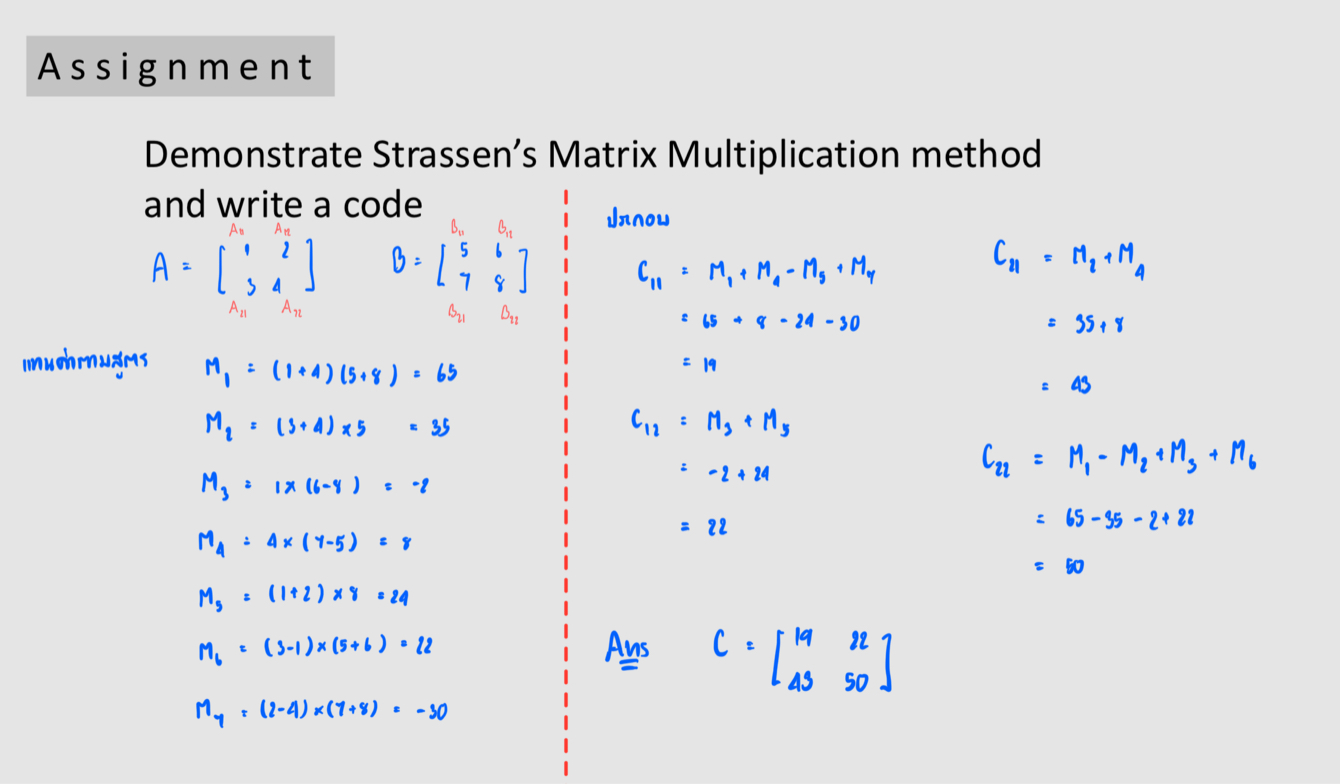

In [236]:
class Matrix: # เมทริกซ์ขนาด n x n
    def __init__(self, data):
        self.data = data
        self.n = len(data)

    # บวกเมทริกซ์
    def add(self, other):
        n = self.n
        result = [[0]*n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                result[i][j] = self.data[i][j] + other.data[i][j]
        return Matrix(result)

    # ลบเมทริกซ์
    def sub(self, other):
        n = self.n
        result = [[0]*n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                result[i][j] = self.data[i][j] - other.data[i][j]
        return Matrix(result)

    # แบ่งเมทริกซ์เป็น 4 ส่วน
    def split(self):
        mid = self.n // 2 # หาจุดกึ่งกลาง
        A11 = [row[:mid] for row in self.data[:mid]] # ส่วนบนซ้าย
        A12 = [row[mid:] for row in self.data[:mid]] # ส่วนบนขวา
        A21 = [row[:mid] for row in self.data[mid:]] # ส่วนล่างซ้าย
        A22 = [row[mid:] for row in self.data[mid:]] # ส่วนล่างขวา
        return Matrix(A11), Matrix(A12), Matrix(A21), Matrix(A22)

    # รวมเมทริกซ์ย่อยเป็นเมทริกซ์ใหญ่
    @staticmethod # ใช้ staticmethod เพราะไม่ต้องใช้ self
    def join(C11, C12, C21, C22):
        top = [C11.data[i] + C12.data[i] for i in range(len(C11.data))] # รวมแถวบน
        bottom = [C21.data[i] + C22.data[i] for i in range(len(C21.data))] # รวมแถวล่าง
        return Matrix(top + bottom) # รวมทั้งสองแถวเข้าด้วยกัน

    # Strassen multiplication
    # ฟังก์ชันคูณเมทริกซ์ด้วยวิธี Strassen
    def strassen(self, other):
        n = self.n

        # base case
        if n == 1: # ถ้าเมทริกซ์ขนาด 1x1 แล้วคูณตรงๆ
            return Matrix([[self.data[0][0] * other.data[0][0]]])
        # แบ่งเมทริกซ์เป็น 4 ส่วน
        A11, A12, A21, A22 = self.split()
        B11, B12, B21, B22 = other.split()

        # คำนวณ M1 ถึง M7
        M1 = (A11.add(A22)).strassen(B11.add(B22))
        M2 = (A21.add(A22)).strassen(B11)
        M3 = A11.strassen(B12.sub(B22))
        M4 = A22.strassen(B21.sub(B11))
        M5 = (A11.add(A12)).strassen(B22)
        M6 = (A21.sub(A11)).strassen(B11.add(B12))
        M7 = (A12.sub(A22)).strassen(B21.add(B22))

        #รวมผลลัพธ์ย่อย โดยStrassen พิสูจน์แล้วว่า สามารถนำ M1–M7 มาประกอบใหม่ให้ได้ผลลัพธ์เดียวกับการคูณปกติ
        C11 = M1.add(M4).sub(M5).add(M7)
        C12 = M3.add(M5)
        C21 = M2.add(M4)
        C22 = M1.sub(M2).add(M3).add(M6)

        return Matrix.join(C11, C12, C21, C22) # รวมเมทริกซ์ย่อยกลับเป็นเมทริกซ์ใหญ่


In [237]:
A = Matrix([
    [1, 2],
    [3, 4]
])

B = Matrix([
    [5, 6],
    [7, 8]
])

C = A.strassen(B)

for row in C.data: #วนลูป ทีละแถว ของเมทริกซ์
     #ตัวแปร row จะรับค่าเป็น list 1 แถวในแต่ละรอบ
     #row = [1, 2] รอบ1
     #row = [3, 4] รอบ2
    print(row)


[19, 22]
[43, 50]


หรือย่อจะได้

In [238]:
def add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A))] for i in range(len(A))]

def sub(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A))] for i in range(len(A))]

def strassen(A, B):
    n = len(A)

    # base case
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    mid = n // 2

    # split matrices
    A00 = [row[:mid] for row in A[:mid]]
    A01 = [row[mid:] for row in A[:mid]]
    A10 = [row[:mid] for row in A[mid:]]
    A11 = [row[mid:] for row in A[mid:]]

    B00 = [row[:mid] for row in B[:mid]]
    B01 = [row[mid:] for row in B[:mid]]
    B10 = [row[:mid] for row in B[mid:]]
    B11 = [row[mid:] for row in B[mid:]]

    # compute M1 to M7
    M1 = strassen(add(A00, A11), add(B00, B11))
    M2 = strassen(add(A10, A11), B00)
    M3 = strassen(A00, sub(B01, B11))
    M4 = strassen(A11, sub(B10, B00))
    M5 = strassen(add(A00, A01), B11)
    M6 = strassen(sub(A10, A00), add(B00, B01))
    M7 = strassen(sub(A01, A11), add(B10, B11))

    # compute result submatrices
    C00 = add(sub(add(M1, M4), M5), M7)
    C01 = add(M3, M5)
    C10 = add(M2, M4)
    C11 = add(sub(add(M1, M3), M2), M6)

    # combine result
    C = []
    for i in range(mid):
        C.append(C00[i] + C01[i])
    for i in range(mid):
        C.append(C10[i] + C11[i])

    return C



In [239]:
A = [[1, 2],
     [3, 4]]

B = [[5, 6],
     [7, 8]]

C = strassen(A, B)
print(C)


[[19, 22], [43, 50]]


Assignment 2

In [240]:
import numpy as np

def strassen(A , B):
    n = len(A)
    
    if n <= 2:
        return np.dot(A,B) #จับ maxtrix มา dot กันได้ออกมาเป็นค่า scalar
    mid = n // 2  #หาจุดกึ่งกลางของ maxtrix 
    A11 = A[:mid , :mid] #ตำเเหน่ง 0:2 2:4 บนซ้ายจะได้ (0,0)(0,1),(1,0)(1,1)
    A12 = A[:mid , mid:] #ตำเเหน่ง 0:2	2:4 บนขวาจะได้ (0,2)(0,3)(1,2)(1,3)
    A21 = A[:mid , :mid] #ตำเเหน่ง 2:4	0:2 ล่างซ้ายจะได้ (2,0)(2,1)(3,0)(3,1)
    A22 = A[:mid , mid:] #ตำเเหน่ง 2:4	2:4 ล่างขวาจะได้ (2,2)(2,3)(3,2)(3,3)
    
    B11 = B[:mid , :mid] #เหมือน A เเต่เปลี่ยนมา B
    B12 = B[:mid , mid:]
    B21 = B[:mid , :mid]
    B22 = B[:mid , mid:]
    
    P1 = strassen(A11, B12 -B22) #สูตรการคูณของ strassen 
    P2 = strassen(A11 + B12 , B22)
    P3 = strassen(A21 + A22 , B11)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A22, B11 + B22)
    P6 = strassen(A12 - A22, B21 + B22)
    P7 = strassen(A11 - A21, B11 + B12)
    
    C11 = P5 + P4 - P2 + P6 #จับค่าที่ได้มา Combination กัน
    C12 = P1 + P2
    C21 = P3 + P4
    C22 = P5 + P1 - P3 - P7
    
    C = np.vstack((np.hstack((C11 , C12)) , np.hstack((C21 , C22)))) #จับค่าเเต่ละ Quarter กลับมาที่เดิมเป็น maxtrix
    return C

In [241]:
A = np.array([[2, 3], [7, 5]])
B = np.array([[6, 8], [4, 2]])
C = strassen(A, B)
print("Matrix C (Result of A * B):\n", C)

Matrix C (Result of A * B):
 [[24 22]
 [62 66]]


กรณี maxtrix ใหญ่กว่า 2x2 ใช้วิธี padding หรือกาาเติม 0 ให้เป็น 2กำลังn เช่น ถ้าเป็น 3x3 ก็เติม 0 ให้เป็น 4x4 หรือ 2กำลังสอง

In [242]:
import numpy as np

def reshapemaxtrix(A , B):
    original_row = A.shape[0]
    original_colum = B.shape[1]
    print( original_row , original_colum)
    
    max_dim = max(A.shape[0] , A.shape[1] , B.shape[1]) #ต้องหา max เพราะ Strassen บังคับว่าต้องเป้น maxtrix nxn เเละ n ต้องเป็นเลขคู่ที่หาร 2 ลงไปได้เรื่อยๆ
    print(max_dim)
    
    n = 2**int(np.ceil(np.log2(max_dim))) #คำนวณหาขนาด maxtrix ที่ยกกำลัง 2 ใช้ Log เพื่อหา เช่น 3x3 ก็จะเป็น log2(3) = 1.58 เเล้วใช้ ceil ปัด 1.58 เป็น 2 2*2 ก็จะได้ n = 4
    
    A_pad = np.pad(A , ((0 , n-A.shape[0]) , (0 , n-A.shape[1])) , mode="constant")
    B_pad = np.pad(B , ((0 , n-B.shape[0]) , (0 , n-B.shape[1])) , mode="constant")
    
    C_pad = strassen(A_pad , B_pad)
    
    return C_pad #[:orig_rows, :orig_cols] ใช้การ slice เพื่อเอาเเค่ 3x3 ได้
    
A_3x3 = np.array([[1, 2, 3], 
                  [4, 5, 6], 
                  [7, 8, 9]])

B_3x3 = np.array([[9, 8, 7], 
                  [6, 5, 4], 
                  [3, 2, 1]])
reshapemaxtrix(A_3x3 , B_3x3)

3 3
3


array([[ 20,  42,  64,   0],
       [134, 105,  76,   0],
       [ 48,  42,  36,   0],
       [120, 105,  90,   0]])

การหา Closet pair โดย Divide and conquer

In [243]:
import math

def distance(p1 , p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def stripCloset(strip , d):
    min_dist = d
    
    strip.sort(key=lambda point:point[1])
    
    for i in range(len(strip)):
        for j in range(i +1 , len(strip)):
            if (strip[j][1] - strip[i][1]) < min_dist:
                min_dist = min(min_dist , distance(strip[i] , strip[j]))
            else:
                break
    return min_dist

def minDistUtill(points , left , right):
    if right - left <= 2:
        min_dist = float("inf")
        for i in range(left , right):
            for j in range(i+1 , right):
                min_dist = min(min_dist , distance(points[i] , points[j]))
        return min_dist
    
    mid =  (left + right) // 2
    mid_x = points[mid][0]
    
    dl = minDistUtill(points , left , mid)
    dr = minDistUtill(points , mid , right)
    
    d = min(dl , dr)
    
    strip = []
    for i in range(left , right):
        if abs(points[i][0] - mid_x) < d:
            strip.append(points[i])
            
    stripDist = stripCloset(strip ,d)
    
    return min(d , stripDist)

def minDistance(points):
    n = len(points)
    
    points.sort(key=lambda point:point[0])
    
    return minDistUtill(points , 0 , n)

if __name__ == "__main__" :
    points = [[-1, -2], [0, 0], [1, 2], [2, 3]]
    res = minDistance(points)
    
    
    print(f"{res:6f}")
    


    
    

1.414214


quickhull

In [244]:
hull = set()

def findside(p1 , p2 , p):
    val = (p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0])
    
    if val > 0:
        return 1
    if val < 0:
        return -1
    return 0


def lineDist(p1 , p2 , p):
    return abs((p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0]))

def quickHull(a , n , p1 , p2 , side):
    ind = -1
    max_dist = 0
    
    for i in range(n):
        temp = lineDist(p1 , p2 , a[i])
        
        if (findside(p1 , p2 , a[i]) == side) and (temp > max_dist):
            ind = i
            max_dist = temp
            
    if ind == -1:
        hull.add("$".join(map(str , p1)))
        hull.add("$".join(map(str , p2)))
        return
    
    quickHull(a , n , a[ind], p1 , -findside(a[ind] , p1 , p2))
    quickHull(a , n , a[ind], p2 , -findside(a[ind] , p2 , p1))
    
def printHull(a , n):
    if (n < 3):
        print("Convex hull not possible")
        return
    
    min_x = 0
    max_x = 0
    for i in range(1 , n):
        if a[i][0] < a[min_x][0]:
            min_x = i 
        if a[i][0] > a[max_x][0]:
            max_x = i
    quickHull(a , n , a[min_x] , a[max_x] , 1)
    quickHull(a , n , a[min_x] , a[max_x] , -1)
    
    print("The possible is convex hull are:")
    
    for element in hull:
        x = element.split("$")
        print("(" , x[0] , "," , x[1] , "," , end = "")
    
    

In [245]:
a = [[0, 3], [1, 1], [2, 2], [4, 4],
     [0, 0], [1, 2], [3, 1], [3, 3]]
n = len(a)
printHull(a, n)

The possible is convex hull are:
( 3 , 1 ,( 0 , 0 ,( 4 , 4 ,( 0 , 3 ,